<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter</center>

### *Компания HeadHunter хочет построить модель, которая бы автоматически определяла примерный уровень заработной платы, подходящей пользователю, исходя из информации, которую он указал о себе. Но, как вы знаете, прежде чем построить модель, данные необходимо преобразовать, исследовать и очистить. В этом и состоит суть поставленной задачи.*

# Базовый анализ структуры данных 

####  1. Импортируем необходимые библиотеки, которые понадобятся в дальнейшем и прочитаем данные 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
hh_df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'dst-3.0_16_1_hh_database.csv'

#### 2. Выведем несколько первых строк таблицы, чтобы убедиться, что наши данные не повреждены и ознакомимся с их признаками и структурой 

In [ ]:
hh_df.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

#### 3. Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице

#### 4. Обратим внимание на информацию о числе непустых значений

In [ ]:
hh_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

#### 5. Выведем основную статистическую информацию о столбцах

In [ ]:
display(hh_df.nunique())

Пол, возраст                       16003
ЗП                                   690
Ищет работу на должность:          14929
Город, переезд, командировки       10063
Занятость                             38
График                                47
Опыт работы                        44413
Последнее/нынешнее место работы    30214
Последняя/нынешняя должность       16927
Образование и ВУЗ                  40148
Обновление резюме                  18838
Авто                                   2
dtype: int64

# Преобразование данных

#### 1. Признак **"Образование и ВУЗ"** имеет неудобный формат. Поэтому, с помощью функции-преобразования создадим новый признак **"Образование"**, который должен иметь всего четыре категории: **"высшее"**, **"неоконченное высшее"**, **"среднее"** и **"средне-специальное"**. После этого удалим признак **"Образование и ВУЗ"**. 

In [ ]:
def get_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
# применяем данную функцию для создания нового признака    
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)
# посмотрим сколько соискателей имеет среднее образование
print(hh_df['Образование'].value_counts()['среднее'])

559


In [ ]:
# убедимся, что признак "Образование" содержит только четыре категории
hh_df['Образование'].unique()

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

#### 2. Признак **"Пол, возраст"** представлен в формате **< Пол, возраст, дата рождения>**. Создадим два новых признака: **"Пол"** и **"Возраст"**. Пол будет иметь два значени: **"М"** - мужчина, **"Ж"** - женщина, а возраст представлен целым числом. После этого удалим столбец **"Пол, возраст"**.

In [ ]:
def get_gender(gender):
    gender_list = gender.split(' ')
    gender_type = gender_list[:1]
    if 'Мужчина' in gender_list:
        return 'М'
    elif 'Женщина' in gender_list:
        return 'Ж'
    return gender_type

hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)

def get_age(age):
    age_list = age.split(' ')
    age = int(age_list[3])
    return age

Age = hh_df['Пол, возраст'].apply(get_age)

hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age)
hh_df = hh_df.drop(['Пол, возраст'], axis = 1 )
hh_df.head()

ЗП                          Ищет работу на должность:  \
0   29000 руб.                            Системный администратор   
1   40000 руб.                               Технический писатель   
2   20000 руб.                                           Оператор   
3  100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4  140000 руб.                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программист  08.04.2019 14:23   
4                              Менеджер по продажам  22.04.2019 10:32   

                             Авто          Образование Пол  Возраст  
0  Имеется собственный автомобиль  неоконченное высшее   М       39  
1                      Не указано               высшее   М       60  
2                      Не указано  среднее специальное   Ж       36  
3                      Не указано               высшее   М       38  
4                      Не указано               высшее   Ж       26

In [ ]:
# подсчитаем процент женских резюме, округленный до сотых
round((hh_df['Пол'].value_counts()['Ж'])/(hh_df['Пол'].count()) * 100,2)

19.07

In [ ]:
# посчитаем средний возраст соискателей и округлим до десятых
round(((hh_df['Возраст']).mean()),1)

32.2

In [ ]:
# проверим таблицу на наличие пропусков и будем учитывать это в дальнейших преобразованиях
cols_null_percent = hh_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

#### 3. Следующий признак, который требует преобразования - это **"Опыт работы"**. В этом признаке наибольшее количество пропусков и он представлен в неудобном формате. Необходимо выделить общий опыт работы соискателя в месяцах и поместить его в новый признак **"Опыт работы (месяц)"**, после чего удалим колонку **"Опыт работы"**. 

In [ ]:
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return np.nan
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)
hh_df = hh_df.drop(['Опыт работы'], axis = 1 )

In [ ]:
# посмотрим медианный опыт работы в новом признаке
hh_df['Опыт работы (месяц)'].median() 

100.0

#### 4. Следующий признак **"Город, переезд, командировки"**. Создадим отдельные признаки: **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. Преобразуем признак **"Город"**, чтобы он содержал четыре категории: **"Москва"**, **"Санкт-Петербург"**, **"город-миллионник"** (из списка) и **"другие"**. Если информация о готовности к командировкам отсутствует, то будем считать, что соискатель не готов к командировкам. После преобразований удалим оригинальный столбец.

In [ ]:
def get_city(string):
    
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    string_splitted = string.split(' , ')[0]
    
    if string_splitted == 'Москва':
        return 'Москва'
    elif string_splitted == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif string_splitted in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
def get_ready_to_move(string):
    if ('не готов к переезду' in string) or ('не готова к переезду' in string):
        return False
    elif 'хочу' in string:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(string):
    if ('командировка' in string):
        if ('не готов к командировкам' in string) or('не готова к командировкам' in string):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_move)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

In [ ]:
# посмотрим сколько соискателей живут в Санкт-Петербурге, округлив до целого
print(round((hh_df['Город'].value_counts()['Санкт-Петербург'])/(hh_df['Город'].count()) * 100)) 
# проверим сколько соискателей готовы и к переездам и к командировкам
print(round(hh_df[
    hh_df['Готовность к переезду'] & hh_df['Готовность к командировкам']
].shape[0] / hh_df.shape[0] *100))

11
32


#### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости **(полная занятость, частичная занятость, проектная работа, волонтёрство, стажировка)** и желаемого графика работы **(полный день, сменный график, гибкий график, удалённая работа, вахтовый метод)**. На сайте **hh.ru** соискатель может указывать различные комбинации данных категорий, а значит, множество уникальных значениай, что мешает анализу. Применим метод преобразования категориальных признаков  **One Hot Encoding** и созданим отдельные категории для каждого признака. Если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится **True**, иначе — **False**. После преобразований, удалим оригинальные столбцы **"Занятость"** и **"График"**.

#### Метод преобразования категориальных признаков One Hot Encoding и его схема представлена на рисунке ниже:

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>


In [ ]:
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
roster = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, roster in zip(employments, roster):
    hh_df[employment] = hh_df['Занятость'].apply(lambda x: employment in x)
    hh_df[roster] = hh_df['График'].apply(lambda x: roster in x)
hh_df = hh_df.drop('Занятость', axis=1)
hh_df = hh_df.drop('График', axis=1)


In [ ]:
# Посмотрим, сколько людей ищут проектную работу и волонтёрство 
print(hh_df[hh_df['проектная работа'] & hh_df['волонтерство']].shape[0])
# А также, сколько людей хотят работать вахтовым методом и с гибким графиком
print(hh_df[hh_df['вахтовый метод'] & hh_df['гибкий график']].shape[0])

436
2311


#### 6. Теперь займемся преобразованием основного признака, заработная плата - **"ЗП"**. Проблема в том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он хотел бы её получать, что неудобно для сравнительнонго анализа. Необходимо привести заработную плату к единой валюте, например рублям. Экспортируем курсы валют с 27.12.2017 по 05.12.2029 с интернет сайта **MDС.RU**. Создаем новый DataFrame - **"currency_df"**. Нас будут интересовать столбцы: **"currency"**, **"date"**, **"proportion"**, и **"close"** (последний зафиксированный курс валюты на указанный день). Дату, по которой определяется курс берем из колонки **"Обновление резюме"**, где содержится дата и время, когда соискатель выложил свое последнее резюме. 

In [ ]:
currency_df = pd.read_csv('ExchangeRates.csv', sep=',')
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    5664 non-null   object 
 1   per         5664 non-null   object 
 2   date        5664 non-null   object 
 3   time        5664 non-null   object 
 4   close       5664 non-null   float64
 5   vol         5664 non-null   int64  
 6   proportion  5664 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 309.9+ KB


#### Вот так выглядит таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге. Воспользуемся этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>

#### Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

In [ ]:
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
rates = pd.read_csv('ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
# переводим признак "Обновление валюты" в формат datetime и выделяем из него дату 
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date
# создаем временный признак 'ЗП(tmp)' и применяем к ниму функцию get_salary_num
hh_df['ЗП (tmp)'] = hh_df['ЗП'].apply(get_salary_num)
# создаем временный признак 'Курс(tmp) и применяем к ниму функцию get_salary_currency
hh_df['Курс (tmp)'] = hh_df['ЗП'].apply(get_salary_currency)
# присоединяем к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты
merged = hh_df.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
# для рубля меняем значение на 1
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
# определяем искомую зарплату в рублях и заносим в новый признак 'ЗП (руб)'
hh_df['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
# удаляем временные колонки
hh_df = hh_df.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)


In [ ]:
# Выясним чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)
print(round(hh_df['ЗП (руб)'].median()/1000))

59


In [ ]:
# final cross-check
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных 

#### 1. Построим распределение признака **"Опыт работы (месяц)"**.

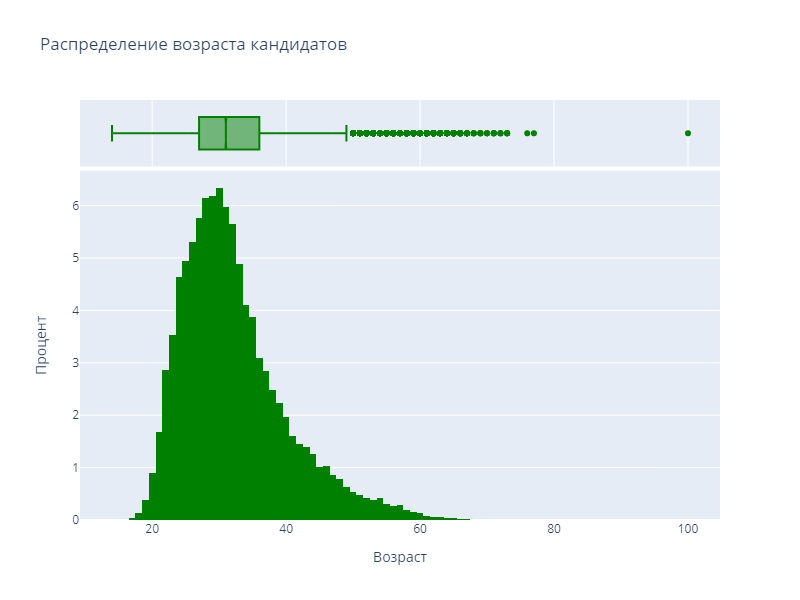

In [ ]:
fig = px.histogram(
    hh_df,
    x='Возраст',
    title='Распределение возраста кандидатов',
    histnorm='percent',
    width=800,
    height=600,
    color_discrete_sequence=['green'],
    marginal='box',
).update_layout(yaxis_title = 'Процент')
fig.show('png')

### *Из графика видно, что распределение имеет лог-нормальную форму, большинство соискателей находится в возрасте 27 - 36 лет, с предельными зачениями 14 и 49 лет, и модой распределения - 30 лет. Явной аномалией является кандидат в возрасте 100 лет.*

#### 2. Построим распределение признака **"Опыт работы (месяц)"** и опишем данное распределение.

In [ ]:
fig = px.histogram(
    hh_df,
    x='Опыт работы (месяц)',
    title='Распределение опыта кандидатов',
    width=800,
    height=600,
    marginal='box',
    color_discrete_sequence=['magenta'],
).update_layout(yaxis_title = 'Количество кандидатов')
fig.show('png')

: 

### *На этом графике распределение также имеет лог-нормальную форму, большинство соискателей имеет опыт от 57 до 154 месяцев, с предельными зачениями 1 и 299 месяцев, и модой распределения - 81 месяц. Явной аномалией является кандидат с опытом в 1188 месяцев.*

In [ ]:
hh_df['Опыт работы (месяц)'].max()

1188.0

#### 3. Построим график распределение признака **"ЗП (руб)"** и проанализируем его.

In [ ]:
fig = px.histogram(
    hh_df,
    x='ЗП (руб)',
    title='Предполагаемая зарплата',
    height=600,
    width=800,
    # для удобства отображения, зададим верхний порог в 1 миллион
    range_x=(0,1000000),
    marginal='box',
    color_discrete_sequence=['red'] 
).update_layout(yaxis_title = 'Количество кандидатов')
fig.show('png')


In [ ]:
hh_df['ЗП (руб)'].mode()

0    50000.0
Name: ЗП (руб), dtype: float64

In [ ]:
mask = hh_df['ЗП (руб)'] > 1000000
hh_df[mask].sort_values(by= ['ЗП (руб)'])
 

Ищет работу на должность:  \
41924                                    Project manager   
43134                                   Chief AI Officer   
28253  Руководитель IT проектов, Роботизация, Автомат...   
39191                                   Специалист по IT   
6931   Программирование, Разработка или Системный адм...   

                         Последнее/нынешнее место работы  \
41924                                      Тинькофф Банк   
43134  Finnish Russian Univeristy Cooperation in Tele...   
28253                                   HAMSTER ROBOTICS   
39191                                          ТОО "AMS"   
6931                                Евразийский банк, АО   

                            Последняя/нынешняя должность Обновление резюме  \
41924            Технолог автоматизации бизнес-процессов        2019-04-22   
43134         Project Manager in Multimedia Technologies        2018-10-25   
28253                              Заместитель директора        2019-04-27   
39191                            Системный администратор        2019-04-22   
6931   Главный специалист Отдел разработки систем роз...        2019-04-22   

                                 Авто          Образование Пол  Возраст  \
41924                      Не указано  неоконченное высшее   М       24   
43134                      Не указано               высшее   М       38   
28253  Имеется собственный автомобиль               высшее   М       39   
39191                      Не указано  среднее специальное   М       29   
6931                       Не указано               высшее   М       31   

       Опыт работы (месяц)   Город  ...  полный день  частичная занятость  \
41924                 39.0  Москва  ...         True                 True   
43134                 97.0  Москва  ...         True                False   
28253                280.0  Москва  ...         True                 True   
39191                 98.0  другие  ...         True                False   
6931                 115.0  другие  ...         True                 True   

       сменный график  проектная работа  гибкий график  волонтерство  \
41924           False              True           True         False   
43134           False             False          False         False   
28253           False              True           True         False   
39191           False             False          False         False   
6931             True              True           True         False   

       удаленная работа  стажировка  вахтовый метод    ЗП (руб)  
41924              True       False           False   1750000.0  
43134             False       False           False   2500000.0  
28253              True       False            True   3000000.0  
39191             False       False           False   7675224.0  
6931               True       False           False  24304876.0  

[5 rows x 23 columns]

#### *В соответсвие с графиком, подавляющее число соискателей предполагяют зарплату от 37000 до 95000, с нижним пределом - 1 и верхним - 180900 рублей. Модальное значение равно 50000. Нашлось 5 кандидатов, которые рассчитывают на зарплату более одного миллиона, скорее всего это выброс, как и какндидаты с зарплатой в один рубль.*

#### 4. Построим диаграмму, которая показывает зависимость медианной желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Будем использовать для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

In [ ]:
median_salary = hh_df[hh_df['ЗП (руб)']<1e6].groupby('Образование', as_index=False).median()
display(median_salary)

Образование  Возраст  Опыт работы (месяц)  Готовность к переезду  \
0               высшее     31.0                109.0                    0.0   
1  неоконченное высшее     28.0                 77.0                    0.0   
2              среднее     29.0                 72.0                    0.0   
3  среднее специальное     28.0                 68.0                    0.0   

   Готовность к командировкам  полная занятость  полный день  \
0                         1.0               1.0          1.0   
1                         1.0               1.0          1.0   
2                         1.0               1.0          1.0   
3                         1.0               1.0          1.0   

   частичная занятость  сменный график  проектная работа  гибкий график  \
0                  0.0             0.0               0.0            0.0   
1                  0.0             0.0               0.0            0.0   
2                  0.0             0.0               0.0            0.0   
3                  0.0             0.0               0.0            0.0   

   волонтерство  удаленная работа  стажировка  вахтовый метод  ЗП (руб)  
0           0.0               0.0         0.0             0.0   60000.0  
1           0.0               0.0         0.0             0.0   50000.0  
2           0.0               0.0         0.0             0.0   40000.0  
3           0.0               0.0         0.0             0.0   40000.0

In [ ]:
fig = px.pie(
    data_frame = median_salary,
    labels = 'Образование',
    values = 'ЗП (руб)',
    names = 'Образование',
    title = 'Предполагаемая зарплата (< 1000000), в зависимости от уровня образования',   
    width=800,
    height=600
)
fig.show('png')

#### *Из графика ясно видно, что претенденты с высшим образованием расчитывают на самую высокую заработную плату - 60 000 в медианном значении. Далее, 50 000 - зарплата, на которую рассчитывают люди с неоконченным высшим. Затем следуют специалисты со средним и средне-специальным образованием, с медианной зарплатой в 40 000. Разница довольно значительная, поэтому, я полагаю, этот признак надо обязательно учитывать.* 

#### 5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

In [ ]:
fig = px.box(
    hh_df,
    x='ЗП (руб)',
    title='Предполагаемая зарплата в зависимости от города ',
    height=600,
    width=800,
    # для более компактного отображения, ограничим зарплату 1 миллионом
    range_x=(0,1000000),
    color = 'Город'
).update_layout(xaxis_title = 'Зарплата')
fig.show('png')

#### *Из графика видно, что наибольшее медианное значение зарплаты (85 000), по очевидной причине, в Москве. Далее следует Санкт-Петербург (60 000) и в городах-миллионниках, как и во все других, значение 40 000. В Москве также наибольший разброс (60 000 - 150 000) и предельные значения (1 - 285 000). В Санкт-Петербурге разброс от 44 000 до 85 000 и предельные значения от 1 до 145 000. Во всех остальныч городах примерно одинаково: межквартальный размах от 30 000 до 60 000, а предельные значения от 1 до 105 000. Плотность и распределение потенциальных выбросов во всех городах примерно одинаковое. Без сомнения, признак будет важен при составлении модели*

#### 6. Построим многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**.

In [ ]:
median_salary1 = hh_df[hh_df['ЗП (руб)']<1e6].groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False).median()
display(median_salary1)

Готовность к переезду  Готовность к командировкам  Возраст  \
0                  False                       False     30.0   
1                  False                        True     31.0   
2                   True                       False     29.0   
3                   True                        True     31.0   

   Опыт работы (месяц)  полная занятость  полный день  частичная занятость  \
0                 79.0               1.0          1.0                  0.0   
1                111.0               1.0          1.0                  0.0   
2                 76.0               1.0          1.0                  0.0   
3                104.0               1.0          1.0                  0.0   

   сменный график  проектная работа  гибкий график  волонтерство  \
0             0.0               0.0            0.0           0.0   
1             0.0               0.0            0.0           0.0   
2             0.0               0.0            0.0           0.0   
3             0.0               0.0            0.0           0.0   

   удаленная работа  стажировка  вахтовый метод  ЗП (руб)  
0               0.0         0.0             0.0   40000.0  
1               0.0         0.0             0.0   60000.0  
2               0.0         0.0             0.0   50000.0  
3               0.0         0.0             0.0   65535.0

In [ ]:
pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    index=['Готовность к переезду'],
    columns='Готовность к командировкам',
    aggfunc='median'
)

In [ ]:
fig = px.bar(
   pivot,
   height=600,
   width=900
).update_layout(yaxis_title = 'Медианная зарплата')
fig.show('png')

#### *Из графика видно, что наибольшая предполагаемая зарплата, примерно 66 000 у наиболее гибких кандидатов, которые готовы как к переездам, так и к командировкам. У тех, кто готов только к командировкам, зарплата 60 000. Кто готов к переезду предполагают зарплату в 50 000. Ну а тех кто не готов к перемещениям, зарплата составляет 40 000. Разница существенная, признак выжный и должем быть учитан при построении модели.* 

#### 7. Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). По полученной сводной таблице построим тепловую карту.

In [ ]:
pivot1 = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
)

In [ ]:
fig = px.imshow(
    pivot1,
    title = 'Зарплата в зависимости от возраста и образования',
    y = ('Высшее', 'Неоконченное высшее', 'Среднее', 'Среднее-специальное')
    ).update_layout(yaxis_title = 'Образование', xaxis_title = 'Возраст', width = 1000, height = 500)
fig.show('png')

#### *На полученной диаграмме видно, что люди с высшим образования представляют наиболее щирокий возрастной спектр и карьерный росто у них наблюдается довольно быстро. Претенденты с незаконченным высшим добиваются повышения зарплаты более медленно, а у кандидатов со средним и особенно со средне-специальным образованием рост зарплаты с возрастом наблюдается наиболее медленно и имеет более низкий максимум.*

#### 8. Построим диаграмму рассеяния, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую (**"trace 2"**), проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше неё, — явные аномалии в наших данных (опыт работы больше либо равен возрасту соискателя). Также нанесем еще одну линию (**"trace 3"**), (14, 100) и (0, 86) - все кандидаты, лежащие выше нее должны были начать профессиональную карьер в 14 лет или раньше, что маловероятно, и также являются потенциальными выбросами.

In [ ]:
hh_df['Опыт работы (год)'] = round(hh_df['Опыт работы (месяц)']/12, 2)

In [ ]:
import plotly.graph_objects as go
fig = px.scatter(
    hh_df,
    x='Возраст',
    y= 'Опыт работы (год)',
    color = 'Пол'
    ).update_layout(yaxis_title = 'Опыт работы(год)', xaxis_title = 'Возраст', width = 1000, height = 800)
fig.add_trace(go.Scatter(x=[0,100], y=[0,100]))
fig.add_trace(go.Scatter(x=[14,100], y=[0,86]))
fig.show('png')

In [ ]:
hh_df = hh_df.drop('Опыт работы (год)', axis=1)

#### 9. Построим диаграмму, отражающую зависимость зарплаты от пола соискателей.

In [ ]:
fig = px.box(
    hh_df,
    x='ЗП (руб)',
    title='Предполагаемая зарплата в зависимости от пола ',
    height=600,
    width=800,
    range_x=(0,1000000),
    color = 'Пол'
).update_layout(xaxis_title = 'Предполагаемая зарплата')
fig.show('png')

#### *На графике наглядно видно, что медианная зарплата у женщин 48 000, когда у мужчин она составляет 60 000 рублей. Разброс у женщин от 30 000  до 70 000, а предельные значения от 25 000 до 130 000 ( женщины более аккуратно заполняют резюме - нет явных выбросов в 1 рубль и вообще потенциальных выбросов значительно меньше). Однако у мужчин разброс от 40 000 до 100 000, с предельными значениями от 1 до 190 000 рублей *

In [ ]:
hh_df.head(2)

Ищет работу на должность: Последнее/нынешнее место работы  \
0   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор        2019-04-16   
1  Менеджер проекта, Аналитик, Технический писатель        2019-04-12   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   

   Опыт работы (месяц)   Город  ...  полный день  частичная занятость  \
0                202.0  другие  ...         True                 True   
1                233.0  другие  ...         True                 True   

   сменный график  проектная работа  гибкий график  волонтерство  \
0            True              True           True         False   
1            True              True           True         False   

   удаленная работа  стажировка  вахтовый метод  ЗП (руб)  
0              True       False            True   29000.0  
1              True       False           False   40000.0  

[2 rows x 23 columns]

#### 10. Нарисуем график, чтобы понять насколько важен признак **"удаленная работа"** в разных городах.

In [ ]:
pivot3 = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Город',
    columns='удаленная работа',
    aggfunc='median'
)

In [ ]:
fig = px.bar(
   pivot3,
    height=600,
    width=800,
   title = 'Зарплата в разных городах в зависимости от готовности работать удаленно'
).update_layout(xaxis_title = 'Город', yaxis_title = 'Зарплата')
fig.show('png')

#### *Из графика видно, что готовность работать удаленно, незначительно ( на 5 000 больше) влияет на зарплату, а в Санкт-Петербурге вообще никак не влияет. Вероятно, этот признак не оказывает существенного влияния на размер зарплаты и врядли необходим при построении модели.*

#### 11. На следующем графике построим диаграмму влияния наличия автомобиля (**"Авто"**) на зарплату в различных городах.

In [ ]:
pivot4 = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Город',
    columns='Авто',
    aggfunc='median'
)

In [ ]:
fig = px.bar(
   pivot4,
    height=600,
    width=800,
   title = 'Медианная зарплата в разных городах в зависимости от наличия автомобиля'
).update_layout(xaxis_title = 'Город', yaxis_title = 'Зарплата')
fig.show('png')

#### *По графику видно, что наличие автомобиля оказывает существенное влияние на уровень заработной платы. В Москве - это 20 000, в Санкт-петербурге - 15 000, а в остальных городах соискатели с автомобилем предполагают зарплату на 10 000 больше. Напрашивается вывод, что наличие автомобиля - важный признак для построения модели*

# Очистка данных.

In [ ]:
dupl_columns = list(hh_df.columns)
mask = hh_df.duplicated(subset=dupl_columns)
hh_duplicates = hh_df[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

Число найденных дубликатов: 161


In [ ]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

In [ ]:
hh_dedupped = hh_df.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Результирующее число записей: 44583


In [ ]:
hh_dedupped['Опыт работы (месяц)'].isna().sum()

168

In [ ]:
# выведен колонки, в которых есть пропуска
null_data = hh_dedupped.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

#### Итак, у нас есть пропуски в трёх столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним медианным значением.

In [ ]:
hh_dedupped = hh_dedupped.dropna( subset = (['Последнее/нынешнее место работы'] and ['Последнее/нынешнее место работы']))
hh_dedupped = hh_dedupped.fillna({'Опыт работы (месяц)' : hh_dedupped['Опыт работы (месяц)'].median()})
# выясним, чему равно результирующее среднее значение в столбце "Опыт работы (месяц)"" после заполнения пропусков и округлим до целых
round((hh_dedupped['Опыт работы (месяц)']).mean())

114

#### Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

In [ ]:
outliers = hh_dedupped[hh_dedupped['ЗП (руб)'] > 1000000] + hh_dedupped[hh_dedupped['ЗП (руб)'] < 1000]
print(outliers.shape[0])
hh_dedupped = hh_dedupped.drop(outliers.index)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

89
Результирующее число записей: 44493


#### В процессе разведывательного анализа мы обнаружили резюме, в которых опыт работы в годах превышал возраст соискателя. Найдем такие резюме и удалим их из данных.

In [ ]:
outliers = hh_dedupped[hh_dedupped['Опыт работы (месяц)']/12 >= hh_dedupped['Возраст']]
hh_dedupped = hh_dedupped.drop(outliers.index)
print(outliers.shape[0])

7


#### В результате анализа мы обнаружили потенциальные выбросы в признаке Возраст. Это оказались резюме людей, чей возраст слишком преклонный для поиска работы. Построим распределение признака в логарифмическом масштабе. Добавим к графику линии, отображающие среднее и границы интервала метода трёх сигм.

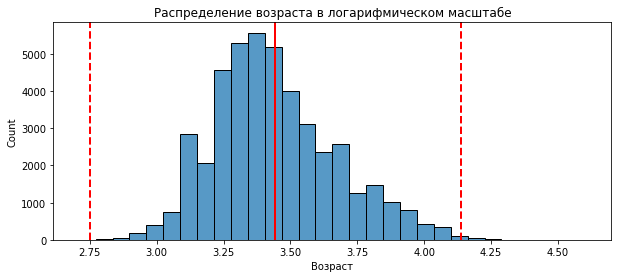

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
#гистограмма в логарифмическом масштабе
log_age= np.log(hh_dedupped['Возраст'])
histplot = sns.histplot(log_age , bins=30, ax=ax)
histplot.set_title('Распределение возраста в логарифмическом масштабе')
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean()+ 3 *log_age.std(), color='r', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='r', ls='--', lw=2)

In [ ]:
print(log_age.skew())

0.4523345344982347


#### *На графике видно, что справа от моды наблюдается чуть больше наблюдений, нежели слева.  Среднее значение также лежит справа от моды и математически, с помошью метода skew мы определяем, что распределение имеет правостороннюю ассиметрию*.

#### Найдем выбросы с помощью метода z-отклонения и удалим их из данных, используя логарифмический масштаб. Давайте сделаем "послабление" на 1 сигму (возьмем 4 сигмы) в правую сторону.

In [ ]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_z_score(hh_dedupped, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44483


In [ ]:
# выведем возраст соискателей, с которым они попадают в категорию выбросов
print(outliers['Возраст'].unique())

[ 15 100]
